In [9]:
!pip install kagglehub pandas numpy scikit-learn matplotlib seaborn scipy openpyxl


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [4]:
import kagglehub
import shutil

# Define custom directory
custom_directory = "/media/rajesh/Rajesh/SLA/Projects/Sales Domain"

# Download dataset
downloaded_path = kagglehub.dataset_download("ad043santhoshs/sales-domain")

# Move dataset to custom location
shutil.move(downloaded_path, custom_directory)

print("Dataset moved to:", custom_directory)


/media/rajesh/Rajesh/SLA/Projects/Sales Domain/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 5.19M/5.19M [00:02<00:00, 2.52MB/s]

Extracting files...


Dataset moved to: /media/rajesh/Rajesh/SLA/Projects/Sales Domain


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
customer = pd.read_csv(f"1/dim_customer.csv")
product = pd.read_csv(f"1/dim_product.csv")
price = pd.read_csv(f"1/fact_gross_price.csv")
manufcost = pd.read_csv(f"1/fact_manufacturing_cost.csv")
discount = pd.read_csv(f"1/fact_pre_discount.csv")
sales = pd.read_csv(f"1/fact_sales_monthly.csv",parse_dates=True)
# salesdomain = pd.read_csv(f"1/Sales_domain.csv",encoding='latin1',parse_dates=True)

In [ ]:
print('customer',customer.shape)
print('product',product.shape)
print('price',price.shape)
print('manufcost',manufcost.shape)
print('discount',discount.shape)
print('sales',sales.shape)
# print('salesdomain',salesdomain.shape)

customer (209, 7)
product (397, 6)
price (1182, 3)
manufcost (1182, 3)
discount (1045, 3)
sales (67251, 5)
salesdomain (1048575, 20)


In [37]:
customer.head()

,customer_code,customer,platform,channel,market,sub_zone,region
0,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC
1,70002018,Atliq e Store,E-Commerce,Direct,India,India,APAC
2,70003181,Atliq Exclusive,Brick & Mortar,Direct,Indonesia,ROA,APAC
3,70003182,Atliq e Store,E-Commerce,Direct,Indonesia,ROA,APAC
4,70004069,Atliq Exclusive,Brick & Mortar,Direct,Japan,ROA,APAC


In [48]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_code  209 non-null    int64 
 1   customer       209 non-null    object
 2   platform       209 non-null    object
 3   channel        209 non-null    object
 4   market         209 non-null    object
 5   sub_zone       183 non-null    object
 6   region         183 non-null    object
dtypes: int64(1), object(6)
memory usage: 11.6+ KB


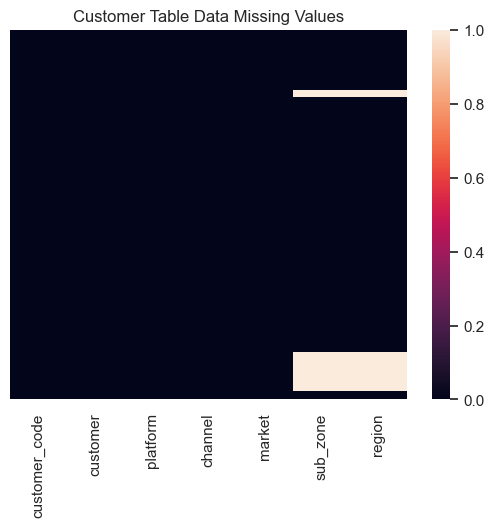

<Figure size 1000x600 with 0 Axes>

In [55]:
sns.heatmap(customer.isnull(), yticklabels=False)
plt.title('Customer Table Data Missing Values')
plt.figure(figsize=(10, 6))
plt.show()

In [38]:
product.head()

,product_code,division,segment,category,product,variant
0,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard
1,A0118150102,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Plus
2,A0118150103,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium
3,A0118150104,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium Plus
4,A0219150201,P & A,Peripherals,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard


In [39]:
price.head()

,product_code,fiscal_year,gross_price
0,A0118150101,2018,15.3952
1,A0118150101,2019,14.4392
2,A0118150101,2020,16.2323
3,A0118150101,2021,19.0573
4,A0118150102,2018,19.5875


In [40]:
manufcost.head()

,product_code,cost_year,manufacturing_cost
0,A0118150101,2018,4.6190
1,A0118150101,2019,4.2033
2,A0118150101,2020,5.0207
3,A0118150101,2021,5.5172
4,A0118150102,2018,5.6036


In [41]:
discount.head()

,customer_code,fiscal_year,pre_invoice_discount_pct
0,70002017,2018,0.0824
1,70002017,2019,0.0777
2,70002017,2020,0.0735
3,70002017,2021,0.0703
4,70002017,2022,0.1057


In [37]:
sales.head()

,date,product_code,customer_code,sold_quantity,fiscal_year
0,2017-09-01,A0118150101,70002017.0,51.0,2018.0
1,2017-09-01,A0118150101,70002018.0,77.0,2018.0
2,2017-09-01,A0118150101,70003181.0,17.0,2018.0
3,2017-09-01,A0118150101,70003182.0,6.0,2018.0
4,2017-09-01,A0118150101,70006157.0,5.0,2018.0


In [ ]:
# salesdomain.head()

,Date,product_code,customer_code,sold_quantity,fiscal_year,division,segment,category,product,variant,customer,platform,channel,market,sub_zone,region,gross_price,cost_year,manufacturing_cost,pre_invoice_discount_pct
0,01-09-2017,A0118150101,70002017,51,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD  3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,15.3952,2018,4.6190,0.0824
1,01-09-2017,A0118150101,70002017,51,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD  3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,15.3952,2019,4.2033,0.0824
2,01-09-2017,A0118150101,70002017,51,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD  3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,15.3952,2020,5.0207,0.0824
3,01-09-2017,A0118150101,70002017,51,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD  3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,15.3952,2021,5.5172,0.0824
4,01-09-2017,A0118150101,70002017,51,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD  3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,14.4392,2018,4.6190,0.0824


In [31]:
print('product', product.isnull().sum())
print('\n\n\n\nprice', price.isnull().sum())
print('\n\n\n\nmanufcost', manufcost.isnull().sum())
print('\n\n\n\ndiscount', discount.isnull().sum())
print('\n\n\n\nsales', sales.isnull().sum())
# print('\n\n\n\nsalesdomain', salesdomain.isnull().sum())


product product_code    0
division        0
segment         0
category        0
product         0
variant         0
dtype: int64




price product_code    0
fiscal_year     0
gross_price     0
dtype: int64




manufcost product_code          0
cost_year             0
manufacturing_cost    0
dtype: int64




discount customer_code               0
fiscal_year                 0
pre_invoice_discount_pct    0
dtype: int64




sales date             0
product_code     0
customer_code    1
sold_quantity    1
fiscal_year      1
dtype: int64




salesdomain Date                             0
product_code                     0
customer_code                    0
sold_quantity                    0
fiscal_year                      0
division                         0
segment                          0
category                         0
product                          0
variant                          0
customer                         0
platform                         0
channel                  

## Null Handling

In [59]:
customer.columns

Index(['customer_code', 'customer', 'platform', 'channel', 'market',
       'sub_zone', 'region'],
      dtype='object')

In [58]:
customer.isnull().sum()

customer_code     0
customer          0
platform          0
channel           0
market            0
sub_zone         26
region           26
dtype: int64

In [3]:
customer[customer['sub_zone'].isnull()==True]

,customer_code,customer,platform,channel,market,sub_zone,region
34,70022084,Atliq Exclusive,Brick & Mortar,Direct,USA,NaN,NaN
35,70022085,Atliq e Store,E-Commerce,Direct,USA,NaN,NaN
36,70023031,Atliq Exclusive,Brick & Mortar,Direct,Canada,NaN,NaN
37,70023032,Atliq e Store,E-Commerce,Direct,Canada,NaN,NaN
182,90022071,Acclaimed Stores,Brick & Mortar,Retailer,USA,NaN,NaN
183,90022072,Path,Brick & Mortar,Retailer,USA,NaN,NaN
184,90022073,Control,Brick & Mortar,Retailer,USA,NaN,NaN
185,90022074,Flipkart,E-Commerce,Retailer,USA,NaN,NaN
186,90022075,BestBuy,Brick & Mortar,Retailer,USA,NaN,NaN
187,90022076,Circuit City,Brick & Mortar,Retailer,USA,NaN,NaN


In [4]:
customer.groupby(['market','sub_zone', 'region'],dropna=False)['channel'].count().reset_index().drop('channel',axis=1)

,market,sub_zone,region
0,Australia,ANZ,APAC
1,Austria,NE,EU
2,Bangladesh,ROA,APAC
3,Brazil,LATAM,LATAM
4,Canada,NaN,NaN
5,Chile,LATAM,LATAM
6,China,ROA,APAC
7,Columbia,LATAM,LATAM
8,France,SE,EU
9,Germany,NE,EU


In [12]:
customer['sub_zone'] = np.where(customer['market']=='USA', 'NA', customer['sub_zone'])
customer['sub_zone'] = np.where(customer['market']=='Canada', 'NA', customer['sub_zone'])
customer['region'] = np.where(customer['market']=='USA', 'AU', customer['region'])
customer['region'] = np.where(customer['market']=='Canada', 'AU', customer['region'])

In [16]:
customer.groupby(['market','sub_zone', 'region'],dropna=False)['channel'].count().reset_index().drop('channel',axis=1)

,market,sub_zone,region
0,Australia,ANZ,APAC
1,Austria,NE,EU
2,Bangladesh,ROA,APAC
3,Brazil,LATAM,LATAM
4,Canada,NA,AU
5,Chile,LATAM,LATAM
6,China,ROA,APAC
7,Columbia,LATAM,LATAM
8,France,SE,EU
9,Germany,NE,EU


## Combining ALL data

In [32]:
tabels = [customer, product, price, manufcost, discount, sales]

In [13]:
sales_summary = sales.merge(customer, on='customer_code', how='outer').merge(
    product, on='product_code', how='outer').merge(price, on='product_code', how='outer').merge(
    manufcost, on='product_code', how='outer').merge(discount, on='customer_code', how='outer')

In [15]:
sales_summary

,date,product_code,customer_code,sold_quantity,fiscal_year_x,customer,platform,channel,market,sub_zone,...,segment,category,product,variant,fiscal_year_y,gross_price,cost_year,manufacturing_cost,fiscal_year,pre_invoice_discount_pct
0,2017-09-01,A0118150101,70002017.0,51.0,2018.0,Atliq Exclusive,Brick & Mortar,Direct,India,India,...,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,2018.0,15.3952,2018.0,4.6190,2018.0,0.0824
1,2017-09-01,A0118150101,70002017.0,51.0,2018.0,Atliq Exclusive,Brick & Mortar,Direct,India,India,...,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,2018.0,15.3952,2018.0,4.6190,2019.0,0.0777
2,2017-09-01,A0118150101,70002017.0,51.0,2018.0,Atliq Exclusive,Brick & Mortar,Direct,India,India,...,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,2018.0,15.3952,2018.0,4.6190,2020.0,0.0735
3,2017-09-01,A0118150101,70002017.0,51.0,2018.0,Atliq Exclusive,Brick & Mortar,Direct,India,India,...,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,2018.0,15.3952,2018.0,4.6190,2021.0,0.0703
4,2017-09-01,A0118150101,70002017.0,51.0,2018.0,Atliq Exclusive,Brick & Mortar,Direct,India,India,...,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,2018.0,15.3952,2018.0,4.6190,2022.0,0.1057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5479748,NaN,A7321160302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Networking,Wi fi extender,AQ Wi Power Dx3,Plus,2022.0,46.0399,2022.0,13.1954,NaN,NaN
5479749,NaN,A7321160303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Networking,Wi fi extender,AQ Wi Power Dx3,Premium,2021.0,42.8483,2021.0,12.9502,NaN,NaN
5479750,NaN,A7321160303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Networking,Wi fi extender,AQ Wi Power Dx3,Premium,2021.0,42.8483,2022.0,13.3387,NaN,NaN
5479751,NaN,A7321160303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Networking,Wi fi extender,AQ Wi Power Dx3,Premium,2022.0,43.5559,2021.0,12.9502,NaN,NaN


In [16]:
sales_summary.to_csv('output.csv', index=False)

In [17]:
ls

 1/   LICENSE   README.md  'Sales data.ipynb'   link.txt   output.csv
